# Assignment 1: Baseball Case Study

## Contents

1. Importing the Libraries and Loading the dataset
2. Exploring and Preprocessing the data
3. Build a machine learning model using the training data.
4. Evaluate the model on the testing data.
5. Comparison and selection of best performing machine learning model for given dataset
6. Predict the number of wins for the 2015 season.

## 1. Importing the Libraries and Loading the dataset

In [1]:
# Importing libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset 
# Loading the baseball dataset from the github url link into a Pandas DataFrame.

url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv"
baseball_data = pd.read_csv(url)

## 2. Exploring and Preprocessing the data

- 2.1 explore data table 
- 2.2 Conducted any necessary data cleaning steps.
- 2.3 Explore Target variable, Features, their distribution and Outliers
- 2.4 Correlation matrix and Heatmap
- 2.5 Split the data into features (X), target variable (y), training and testing sets for model evaluation.


### 2.1 Explore data table

In [2]:

# Display the first few rows of the dataset

baseball_data.head()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# Check data types and statistics

print(baseball_data.info())
print(baseball_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
None
                W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000

### 2.2 Conducting any necessary data cleaning steps

- Checked for missing values in the dataset.
- In this case, no missing values were found, so no imputation is needed.

In [4]:
# Check for missing values

print(baseball_data.isnull().sum())

# Drop any rows with missing values

baseball_data = baseball_data.dropna()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


### 2.3 Explore Target variable, Features, their distribution and Outliers

- Distribution of target variable appeared normal.
- Outliers were found, however, given that we have only 30 rows of data, removing or transforming the data might lead to a 
  loss of information and hence ignored.

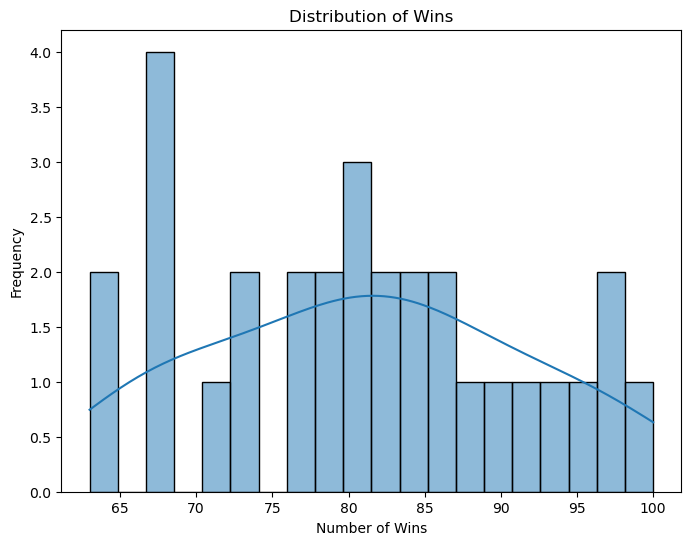

In [5]:
# Visualize the distribution of the target variable (number of wins)

plt.figure(figsize=(8, 6))
sns.histplot(baseball_data['W'], bins=20, kde=True)
plt.title('Distribution of Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Frequency')
plt.show()


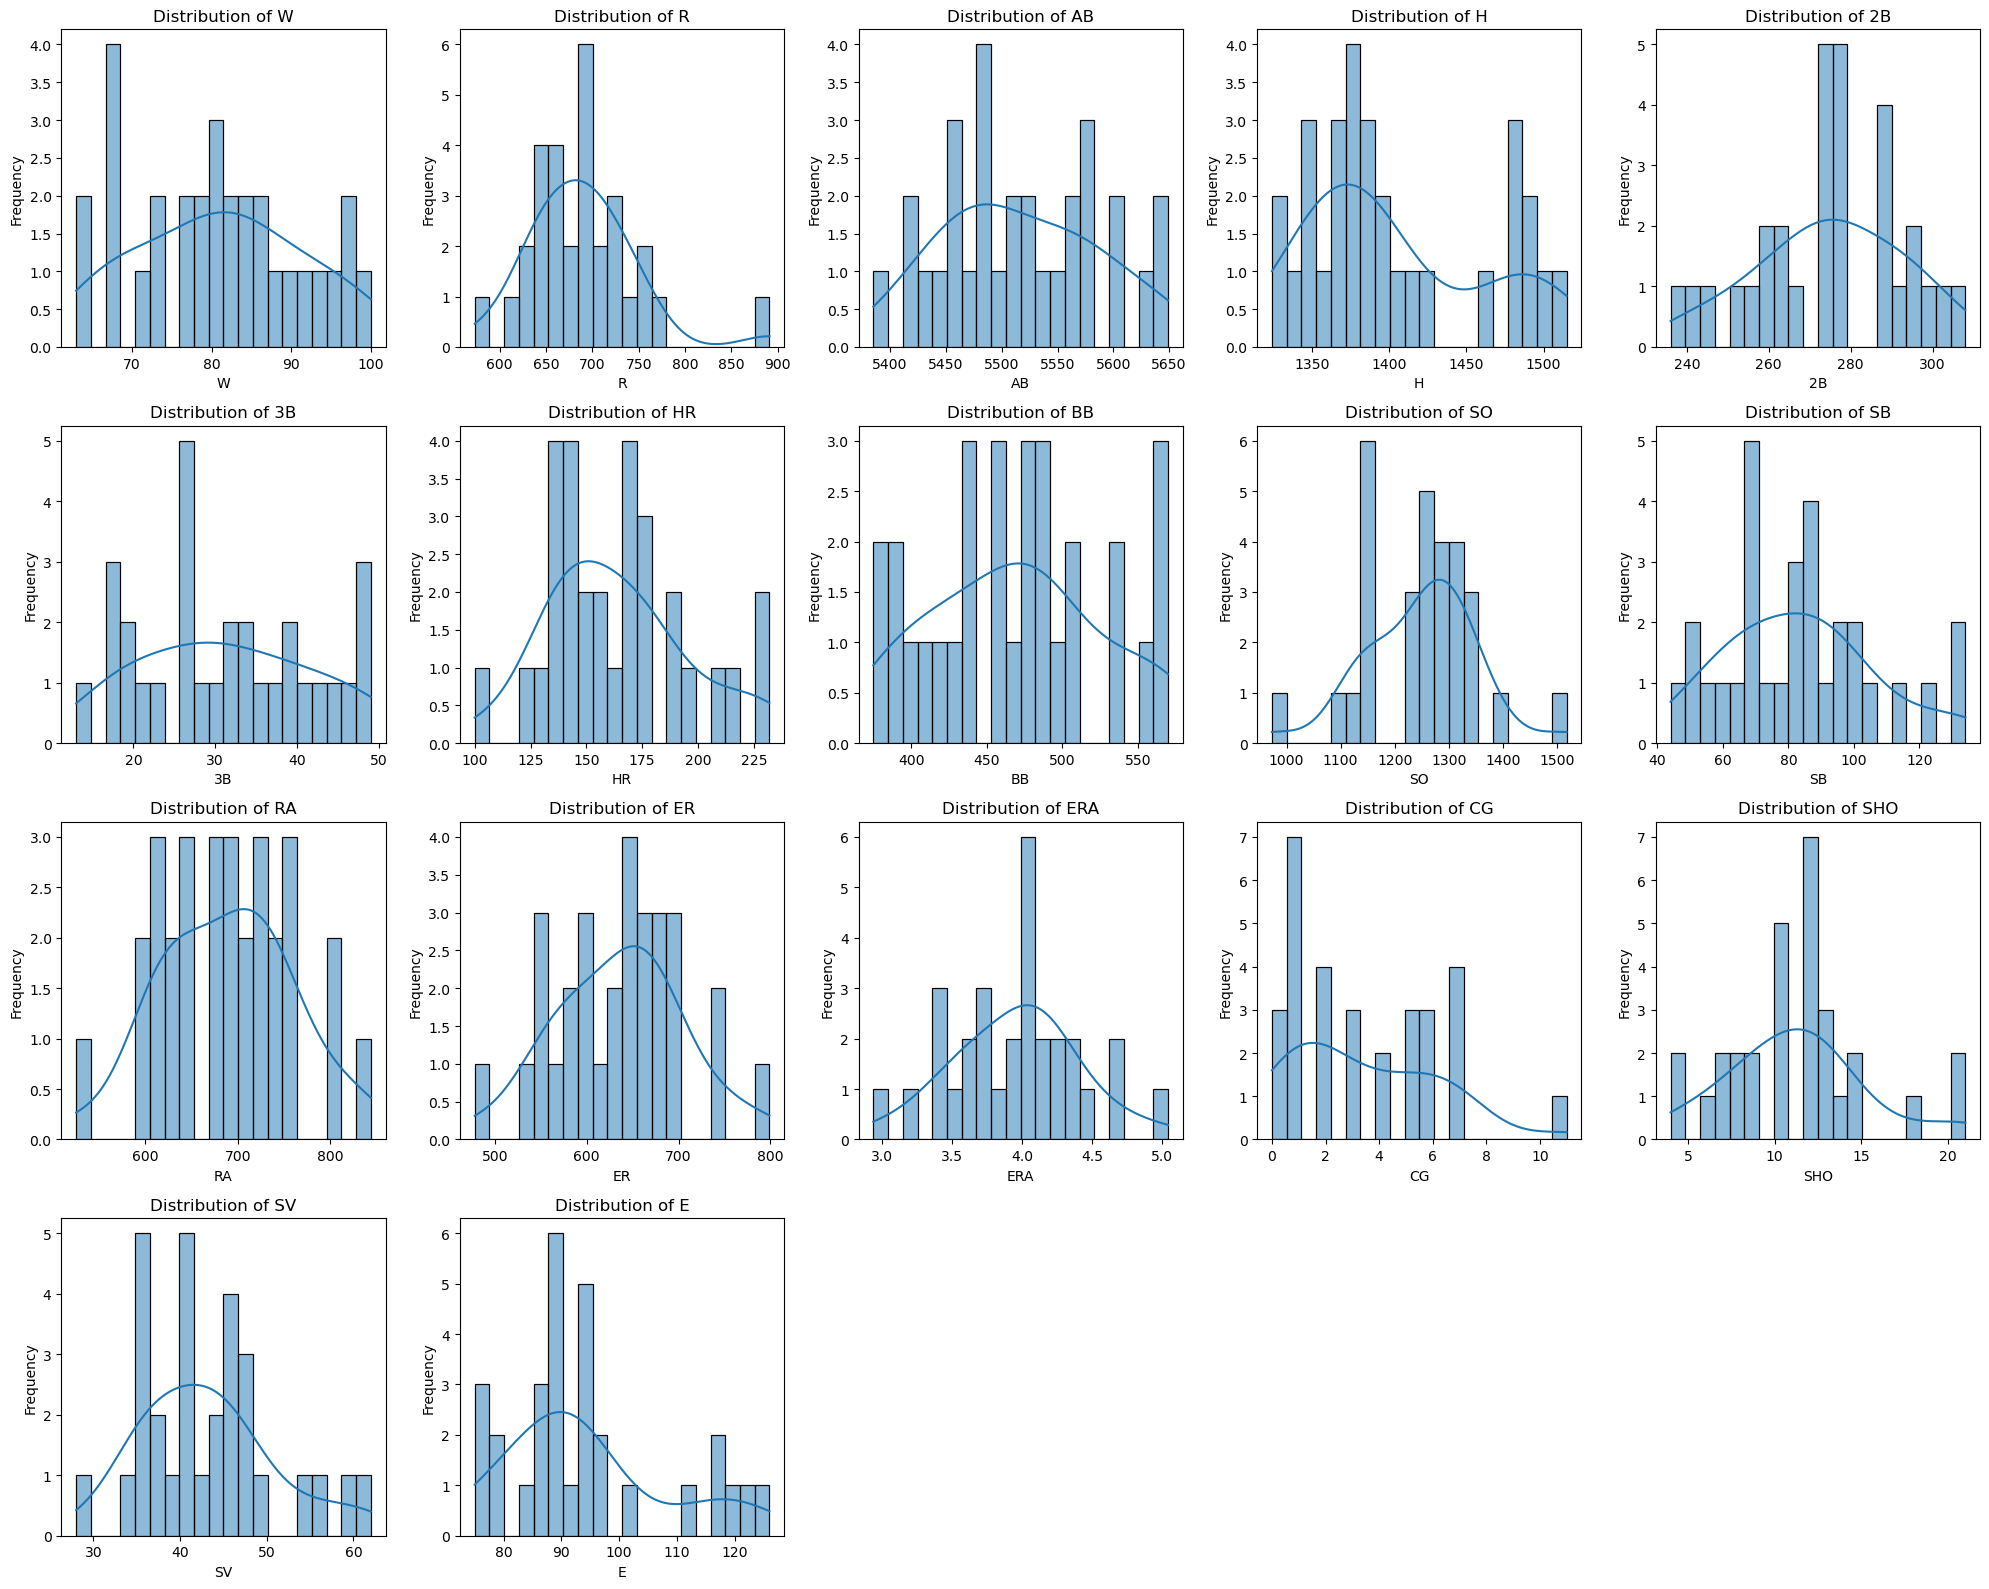

In [6]:
# Select numerical features for visualization
numerical_features = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

# Create a grid of histograms for all numerical features
plt.figure(figsize=(20, 16))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(baseball_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


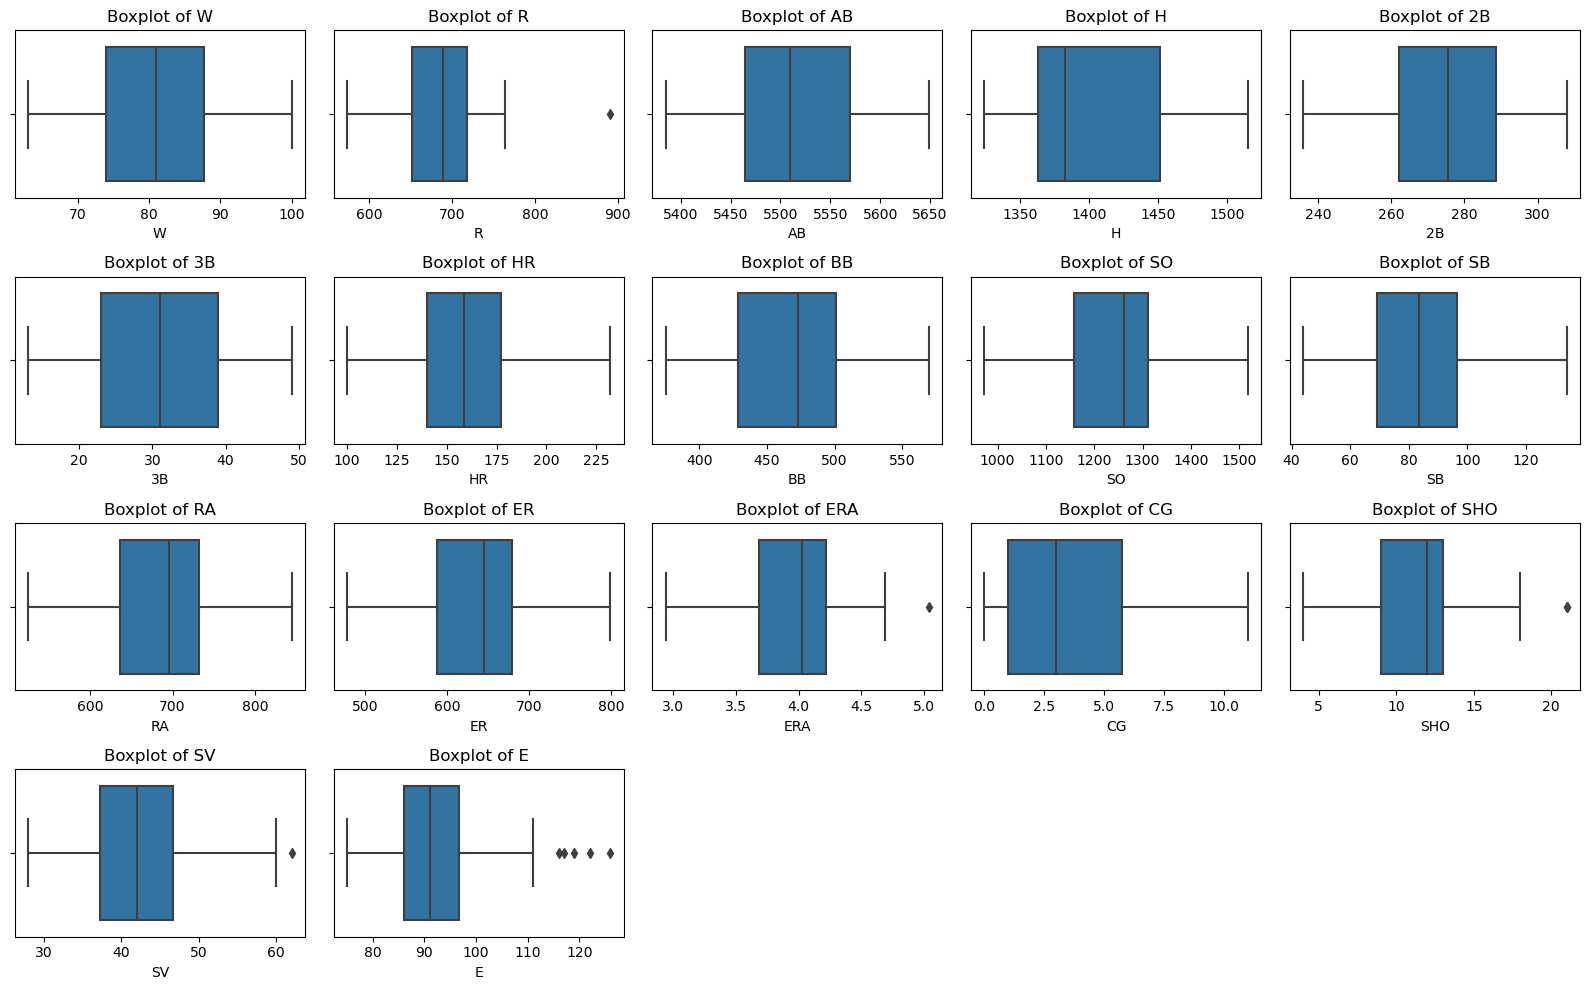

In [7]:
# Select numerical features for checking outliers
numerical_features = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

# Plot boxplots for each numerical feature
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x=baseball_data[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

### 2.4 Correlation matrix and Heatmap

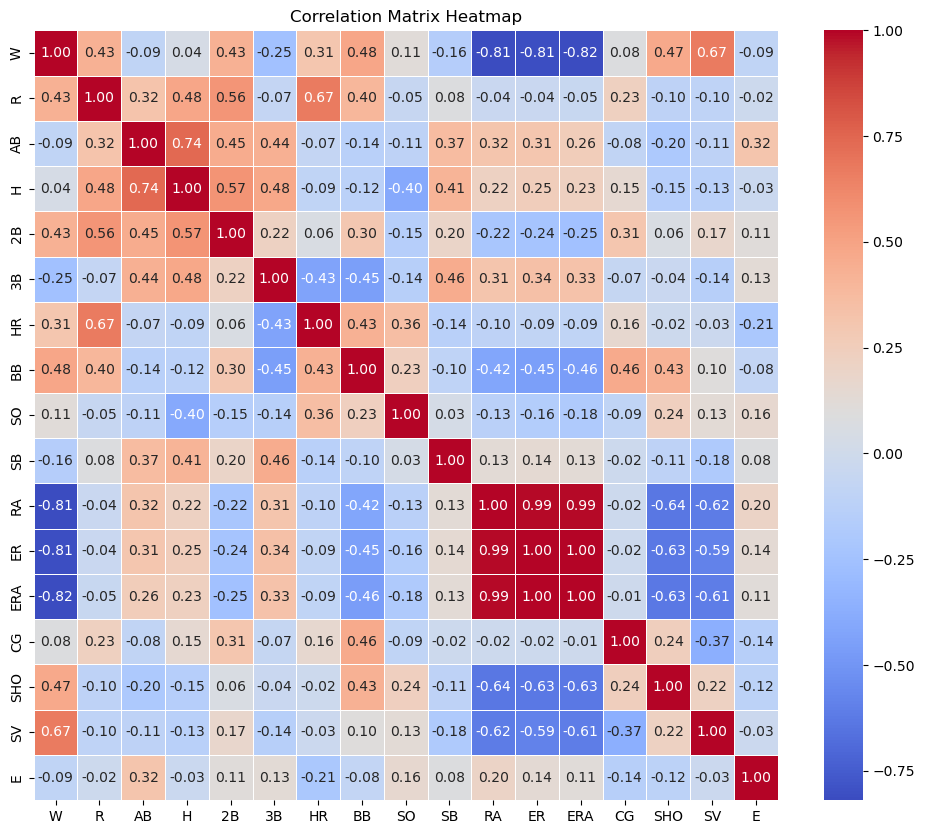

In [8]:

# Calculate the correlation matrix
correlation_matrix = baseball_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### 2.5 Split the data into training and testing sets for model evaluation.

In [9]:
# Split the data into training and testing sets

X = baseball_data.drop('W', axis=1)  # Features
y = baseball_data['W']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#from sklearn.preprocessing import RobustScaler

# Assuming X_train and X_test are your feature matrices

# Initialize the RobustScaler
#robust_scaler = RobustScaler()

# Fit the scaler on the training data and transform both training and testing data
#X_train = robust_scaler.fit_transform(X_train)
#X_test = robust_scaler.transform(X_test)


## 3. Build a machine learning model using the training data.
- 3.1 Build a machine learning model (Linear Regrression)


In [10]:
# Build a machine learning model (Linear Regression)

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

## 4. Evaluate the model on the testing data.

- Linear Regression was run on test data
- An R-squared of 0.79 suggests that our model explains a substantial portion(79%) of the variability in the number of wins.
- The MSE of 27.94 indicates the average squared error, providing a measure of how well our model's predictions align with the   actual values.

Linear Regression - Mean Squared Error:  27.94303250666748
Linear Regression - R-squared: 0.78764003161494


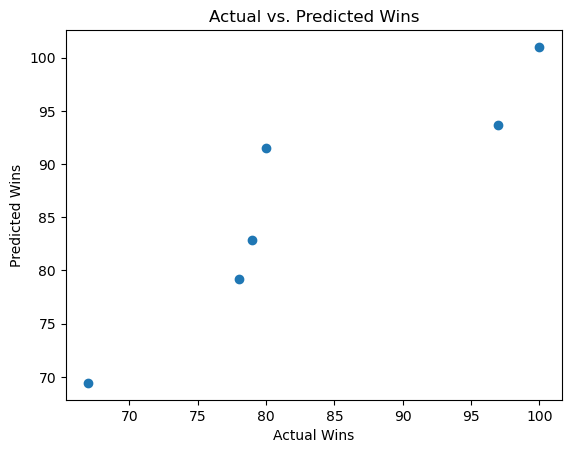

In [11]:
# Evaluate the model on the testing data
y_pred_LR = model_LR.predict(X_test)

# Print model evaluation metrics
print('Linear Regression - Mean Squared Error: ', mean_squared_error(y_test, y_pred_LR))
print('Linear Regression - R-squared:', r2_score(y_test, y_pred_LR))

# Optionally, we can visualize the actual vs. predicted values
plt.scatter(y_test, y_pred_LR)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs. Predicted Wins')
plt.show()

## 5. Comparison and selection of best performing machine learning model for given dataset
- In summary, a higher R-squared and a lower MSE generally indicate better model performance.
- Among various models compared, Linear Regression is found best performing

### 5.1 MSE and R-Square for other ML models

In [12]:
# Decision Trees
from sklearn.tree import DecisionTreeRegressor

# Build a machine learning model (Decision Tree)
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Print model evaluation metrics for Decision Tree
print('Decision Tree - Mean Squared Error:', mean_squared_error(y_test, y_pred_decision_tree))
print('Decision Tree - R-squared:', r2_score(y_test, y_pred_decision_tree))


Decision Tree - Mean Squared Error: 91.83333333333333
Decision Tree - R-squared: 0.30208993033565545


In [13]:
# Support Vector Regression (SVR)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a machine learning model (SVR)
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Evaluate the model on the testing data
y_pred_svr = svr_model.predict(X_test_scaled)

# Print model evaluation metrics for SVR
print('SVR - Mean Squared Error:', mean_squared_error(y_test, y_pred_svr))
print('SVR - R-squared:', r2_score(y_test, y_pred_svr))


SVR - Mean Squared Error: 120.1508479386311
SVR - R-squared: 0.08688399286664139


In [14]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Build a machine learning model (Gradient Boosting Regressor)
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Print model evaluation metrics for Gradient Boosting Regressor
print('Gradient Boosting - Mean Squared Error:', mean_squared_error(y_test, y_pred_gradient_boosting))
print('Gradient Boosting - R-squared:', r2_score(y_test, y_pred_gradient_boosting))


Gradient Boosting - Mean Squared Error: 45.692680610101455
Gradient Boosting - R-squared: 0.6527472024564804


In [15]:
# Neural Networks
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

# Scale the features for Neural Networks
scaler_nn = MinMaxScaler()
X_train_scaled_nn = scaler_nn.fit_transform(X_train)
X_test_scaled_nn = scaler_nn.transform(X_test)

# Build a machine learning model (Neural Networks)
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train_scaled_nn, y_train)

# Evaluate the model on the testing data
y_pred_nn = nn_model.predict(X_test_scaled_nn)

# Print model evaluation metrics for Neural Networks
print('Neural Networks - Mean Squared Error:', mean_squared_error(y_test, y_pred_nn))
print('Neural Networks - R-squared:', r2_score(y_test, y_pred_nn))


Neural Networks - Mean Squared Error: 160.22743756221084
Neural Networks - R-squared: -0.21768793587493973


C:\Users\namit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
# Ridge Regression
from sklearn.linear_model import Ridge

# Build a machine learning model (Ridge Regression)
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred_ridge = ridge_model.predict(X_test)

# Print model evaluation metrics for Ridge Regression
print('Ridge Regression - Mean Squared Error:', mean_squared_error(y_test, y_pred_ridge))
print('Ridge Regression - R-squared:', r2_score(y_test, y_pred_ridge))


Ridge Regression - Mean Squared Error: 32.58853150293408
Ridge Regression - R-squared: 0.7523354160638321


In [17]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Build a machine learning model (Random Forest)
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred_random_forest = random_forest_model.predict(X_test)

# Print model evaluation metrics for Random Forest
print('Random Forest - Mean Squared Error:', mean_squared_error(y_test, y_pred_random_forest))
print('Random Forest - R-squared:', r2_score(y_test, y_pred_random_forest))


Random Forest - Mean Squared Error: 51.939000000000014
Random Forest - R-squared: 0.6052767574414185


### 5.2 Comparison of performance of various ML Models

In [18]:
import pandas as pd

# Create a list to store evaluation metrics for each model
model_results = []

# Linear Regression
model_results.append({
    'Model': 'Linear Regression',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_LR),
    'R-squared': r2_score(y_test, y_pred_LR)
})

# Decision Tree
model_results.append({
    'Model': 'Decision Tree',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_decision_tree),
    'R-squared': r2_score(y_test, y_pred_decision_tree)
})

# Random Forest
model_results.append({
    'Model': 'Random Forest',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_random_forest),
    'R-squared': r2_score(y_test, y_pred_random_forest)
})

# SVR
model_results.append({
    'Model': 'SVR',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_svr),
    'R-squared': r2_score(y_test, y_pred_svr)
})

# Gradient Boosting
model_results.append({
    'Model': 'Gradient Boosting',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_gradient_boosting),
    'R-squared': r2_score(y_test, y_pred_gradient_boosting)
})

# Neural Networks
model_results.append({
    'Model': 'Neural Networks',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_nn),
    'R-squared': r2_score(y_test, y_pred_nn)
})

# Ridge Regression
model_results.append({
    'Model': 'Ridge Regression',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_ridge),
    'R-squared': r2_score(y_test, y_pred_ridge)
})

# Create a DataFrame from the list of results
model_comparison = pd.DataFrame(model_results)

# Display the model comparison table
print(model_comparison)


               Model  Mean Squared Error  R-squared
0  Linear Regression           27.943033   0.787640
1      Decision Tree           91.833333   0.302090
2      Random Forest           51.939000   0.605277
3                SVR          120.150848   0.086884
4  Gradient Boosting           45.692681   0.652747
5    Neural Networks          160.227438  -0.217688
6   Ridge Regression           32.588532   0.752335


## 6. Predict the number of wins for the 2015 season.
- since linear regression has the best performance for the given dataset among the different tested ML models, the prediction     is done based on the same. 
- 6.1 using sample input
- 6.2 using user input

### 6.1 Predict the number of wins for the 2015 season - Using Sample input



 Predicted Wins for the 2015 Season:   80.41501071808818


C:\Users\namit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


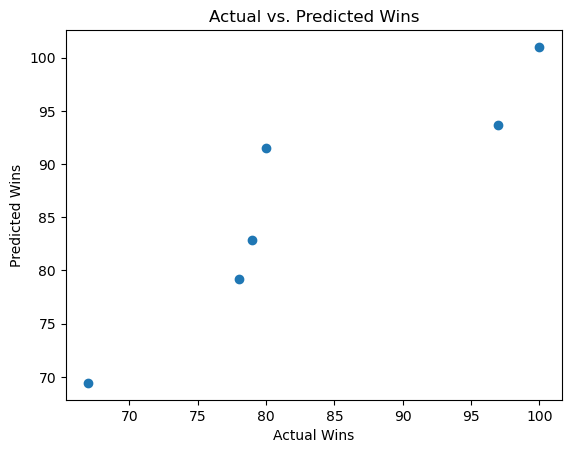

In [19]:
# Predict the number of wins for the 2015 season
# create a sample input for the 2015 season

sample_input_2015 = [[724, 5424, 1497, 260, 21, 139, 383, 1082, 144, 501, 601, 3.73, 2, 5, 40, 91]]

# Make predictions for the 2015 season
predicted_wins_2015 = model_LR.predict(sample_input_2015)

# Print the predicted number of wins for the 2015 season
print('\n\n Predicted Wins for the 2015 Season: \033[1m ', predicted_wins_2015[0] ) 

# Optionally, we can visualize the actual vs. predicted values
plt.scatter(y_test, y_pred_LR)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs. Predicted Wins')
plt.show()

### 6.2 Predict the number of wins for the 2015 season - Using User input

Enter value for R (or press Enter to use mean value-688.2333333333333): 
Using mean value (688.2333333333333) for R
Enter value for AB (or press Enter to use mean value-5516.266666666666): 
Using mean value (5516.266666666666) for AB
Enter value for H (or press Enter to use mean value-1403.5333333333333): 
Using mean value (1403.5333333333333) for H
Enter value for 2B (or press Enter to use mean value-274.73333333333335): 
Using mean value (274.73333333333335) for 2B
Enter value for 3B (or press Enter to use mean value-31.3): 
Using mean value (31.3) for 3B
Enter value for HR (or press Enter to use mean value-163.63333333333333): 
Using mean value (163.63333333333333) for HR
Enter value for BB (or press Enter to use mean value-469.1): 
Using mean value (469.1) for BB
Enter value for SO (or press Enter to use mean value-1248.2): 
Using mean value (1248.2) for SO
Enter value for SB (or press Enter to use mean value-83.5): 
Using mean value (83.5) for SB
Enter value for RA (or press Enter

C:\Users\namit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


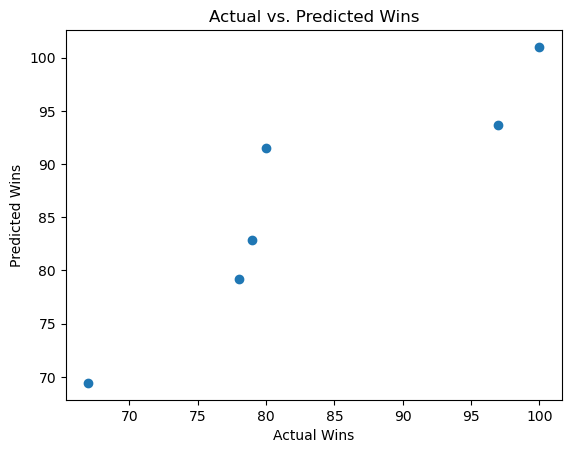

In [22]:
# Take user inputs for 2015 season
sample_input_2015 = []
for column in X.columns:
    value = input(f"Enter value for {column} (or press Enter to use mean value-{X[column].mean()}): ")
    if value.strip():  # Check if the user entered a value
        sample_input_2015.append(float(value))
    else:
        # If the user pressed Enter, use the mean value for that column
        mean_value = X[column].mean()
        print(f"Using mean value ({mean_value}) for {column}")
        sample_input_2015.append(mean_value)

# Convert the list to a 2D array for prediction
sample_input_2015 = [sample_input_2015]

# Make predictions for the 2015 season
predicted_wins_2015 = model_LR.predict(sample_input_2015)

# Print the predicted number of wins for the 2015 season
print('\n\n Predicted Wins for the 2015 Season: \033[1m ', predicted_wins_2015[0])

# Optionally, you can visualize the actual vs. predicted values
plt.scatter(y_test, y_pred_LR)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs. Predicted Wins')
plt.show()